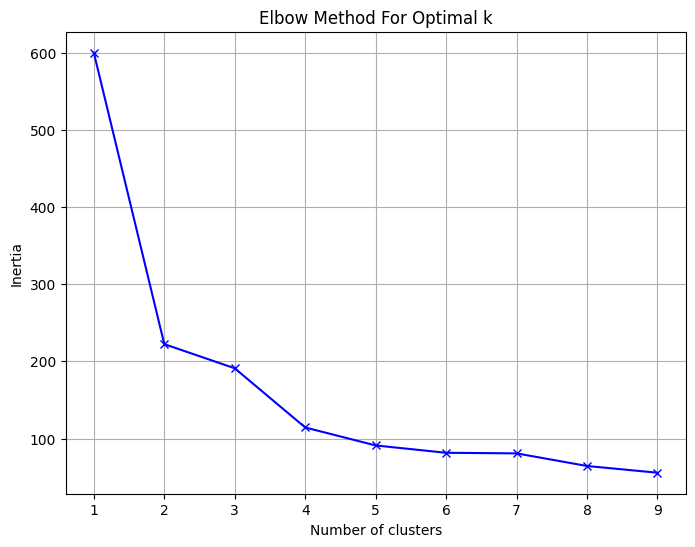

K-Means Silhouette Score: 0.48
K-Means Davies-Bouldin Index: 0.79
K-Means Inertia: 191.02


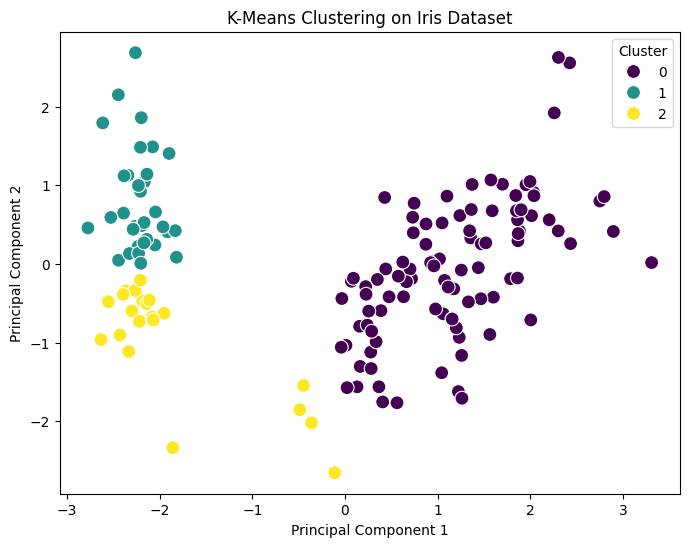

In [1]:
# Import necessary libraries
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = datasets.load_iris()
data = iris.data

# Step 1: Preprocessing
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 2: Elbow Method to find the optimal number of clusters
inertia_values = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia_values, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(K_range)  # Ensuring all k values are shown on the x-axis
plt.grid()
plt.show()

# Step 3: Applying K-Means with the optimal number of clusters (based on the Elbow plot)
optimal_k = 3  # Update this based on the elbow method result
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Evaluation Metrics
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")

kmeans_davies = davies_bouldin_score(scaled_data, kmeans_labels)
print(f"K-Means Davies-Bouldin Index: {kmeans_davies:.2f}")

kmeans_inertia = kmeans.inertia_
print(f"K-Means Inertia: {kmeans_inertia:.2f}")

# Step 4: Visualization of K-Means clusters
# Applying PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_labels, palette='viridis', s=100)
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()
